# 第三週：基本文字資料的處理(中文)
**Author:** 蔡睿澤<br>
**Date created:** 2023/02/19<br>
**Last modified:** 2023/03/02<br>

本週課程為「基本文字資料的處理」，目的為了解基本的文字處理概念。文字處理的步驟會因所要分析之語言不同而有所差異，在這個Jupyter Notebook當中將會展示「中文」的文字處理過程，並且搭配python程式碼進行講解。在後面的內容中，我們將會介紹所使用到的套件、文字處理基本流程、實際應用等三個部分。

## 大綱
1. 套件說明
2. 文字處理基本流程
    - 2.1 建立中文文本
    - 2.2 中文斷詞
    - 2.3 去除停用字
3. 實際應用

## 1. 套件說明

下面列出在本次實作過程中我們所使用到的相關套件，在這個Notebook當中我們將會簡單的展示這些套件的使用方式，關於各個套件的進階使用請同學參照其官網的說明。

- Pandas: 一個資料分析的函式庫，提供了DataFrame等資料格式，與資料處理的函數。
- jieba: 中文斷詞套件
- re: 正規表達式套件。
- wordcloud: 文字雲繪圖工具。
- matplotlib: 繪圖工具。

In [103]:
import jieba
import jieba.analyse
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [104]:
# 設定圖的字體
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

## 2. 文字處理基本流程
接下來的章節我們將介紹文字處理的基本流程。其中大概可以分為六個步驟

+ **資料蒐集：** <br>
如同上面所述，文字型資料被視為是一種非結構化的資料。其資料來源相當的廣泛，如：論壇、新聞網、社群媒體、專利、論文等...。其中，論壇、新聞網、社群媒體這類由使用者所產生出來的資料我們將其稱為User Generated Data(UGC)。通常來說，我們會使用網路爬蟲的技術來取得這樣的資料(網路爬蟲的技術不會在此範例中討論)。 <br><br>
+ **資料初步清理：** <br>
將文字內容轉為正規的語句，例如：去除特定標籤、符號、統一標點符號的使用等等 <br><br>
+ **斷句斷詞：** <br>
使用工具區隔文章中不同的句子、詞彙 <br><br>
+ **去除停用字：** <br>
停用字就是與分析無關的詞彙，甚至這些詞彙可能會影響分析的結果。因此我們必須在資料處理的過程中將其排除。例如：語助詞 <br><br>
+ **產生結構化資料：** <br>
根據需求產生不同結構化資料(Tidy Data)，以供後續分析使用。 <br><br>
+ **應用更多分析：** <br>
進行不同的分析，例如：情緒分析、詞頻分析

### 2.1 建立文本

In [105]:
chinese_text = "近幾年來「良心投資」逐漸形成一股風潮，投資人對於企業社會責任愈來愈重視，環境保護、社會責任與公司治理加總的ESG概念，也成為當今華爾街和法人投資圈最熱門的熱搜關鍵英文縮寫。什麼是「ESG」？就是環境保護（Environmental）、社會責任（Social）與公司治理（Governance）這3個英文字的縮寫，從政府推動限塑政策、上市公司需編製與申報企業社會責任報告書、民間團體自動發起淨灘活動等，背後都蘊含著ESG的意涵。ESG投資可以回溯到2006年聯合國責任投資原則（UNPRI）的成立，致力於推動全球各大投資機構在投資決策過程中必須納入ESG因子，並協助PRI的簽署國家全面提升責任投資的能力。戮力經營本業的企業，若不重視ESG，就算有好的本益比、好的成長，也會影響公司價值，尤其是近年來環境變遷等「無差別衝擊」影響企業經營表現，投資人轉向從ESG、SDGs（聯合國永續發展目標）等評價模式尋找投資標的。"

### 2.2 中文斷詞

斷詞引擎設定：使用 Jieba 當作斷詞系統。

Jieba原先內建為簡體字字典，但我們可以使用繁體字典來做為替換，結果會比較好。另外可能還有一些專有名詞是沒有被包含在預設字典當中，我們也可以使用自定義字典的方式加入，或者使用參數的形式帶入。

In [106]:
# 初始化斷詞引擎：不一定要設定，只使用內建效果也可以
# 參考網址：https://raw.githubusercontent.com/ldkrsi/jieba-zh_TW/master/jieba/dict.txt
jieba.set_dictionary('./dict/dict.txt') 

# 載入自定義辭典：一個詞一行，每行分詞語、詞頻(可省)、詞性(可省)
jieba.load_userdict('./dict/user_dict.txt')

# 參數形式手動加入字詞
words = ['良心投資','投資圈','熱搜','公司治理']
for w in words:
    jieba.add_word(w, freq=None, tag=None)


Building prefix dict from /Users/brandon/SMA_2023S/week3_nlp/dict/dict.txt ...
Loading model from cache /var/folders/wb/4p2wtwfn0hbfl5wk9721_6gm0000gn/T/jieba.u3e16ea9e2ee3915e88ca025f8b6680aa.cache
Loading model cost 0.279 seconds.
Prefix dict has been built successfully.


進行斷詞

In [107]:
token_list = jieba.lcut(chinese_text)
print(token_list)

['近', '幾年', '來', '「', '良心投資', '」', '逐漸', '形成', '一股', '風潮', '，', '投資人', '對於', '企業社會責任', '愈來愈', '重視', '，', '環境保護', '、', '社會責任', '與', '公司治理', '加總', '的', 'ESG', '概念', '，', '也', '成為', '當今', '華爾街', '和', '法人', '投資圈', '最', '熱門', '的', '熱搜', '關鍵', '英文', '縮寫', '。', '什麼', '是', '「', 'ESG', '」', '？', '就是', '環境保護', '（', 'Environmental', '）', '、', '社會責任', '（', 'Social', '）', '與', '公司治理', '（', 'Governance', '）', '這', '3', '個', '英文字', '的', '縮寫', '，', '從', '政府', '推動', '限塑', '政策', '、', '上市', '公司', '需', '編製', '與', '申報', '企業社會責任', '報告書', '、', '民間', '團體', '自動', '發起', '淨灘', '活動', '等', '，', '背後', '都', '蘊含', '著', 'ESG', '的', '意涵', '。', 'ESG', '投資', '可以', '回溯到', '2006', '年', '聯合國', '責任', '投資', '原則', '（', 'UNPRI', '）', '的', '成立', '，', '致力', '於', '推動', '全球', '各大', '投資', '機構', '在', '投資', '決策', '過程', '中', '必須', '納入', 'ESG', '因子', '，', '並', '協助', 'PRI', '的', '簽署', '國家', '全面', '提升', '責任', '投資', '的', '能力', '。', '戮力', '經營', '本業', '的', '企業', '，', '若', '不', '重視', 'ESG', '，', '就算', '有', '好', '的', '本益比', '、', '好', '的', '成長'

### 2.3 移除停用字（無意義的字、標點符號）

In [108]:
# 匯入檔案形式
stopwords = []

# 對於這段文字所定義的停用字列表
with open(f'./dict/text_stopwords.txt','r') as f:
    stopwords = f.read().splitlines() #移除換行符號\n

# 參數形式手動加入停用字
user_stop = ["的", "來", "對於", "愈來愈", "就是", "什麼"]
for i in user_stop:
    stopwords.append(i)

print(stopwords[:10])


['，', '「', '」', '、', '。', '？', '（', '）', '"', '的']


篩選掉token_list裡的停用字

In [109]:
doc_tokens = list(filter(lambda x : x not in stopwords, token_list))
print(doc_tokens)

['近', '幾年', '良心投資', '逐漸', '形成', '一股', '風潮', '投資人', '企業社會責任', '重視', '環境保護', '社會責任', '與', '公司治理', '加總', 'ESG', '概念', '也', '成為', '當今', '華爾街', '和', '法人', '投資圈', '最', '熱門', '熱搜', '關鍵', '英文', '縮寫', '是', 'ESG', '環境保護', 'Environmental', '社會責任', 'Social', '與', '公司治理', 'Governance', '這', '3', '個', '英文字', '縮寫', '從', '政府', '推動', '限塑', '政策', '上市', '公司', '需', '編製', '與', '申報', '企業社會責任', '報告書', '民間', '團體', '自動', '發起', '淨灘', '活動', '等', '背後', '都', '蘊含', '著', 'ESG', '意涵', 'ESG', '投資', '可以', '回溯到', '2006', '年', '聯合國', '責任', '投資', '原則', 'UNPRI', '成立', '致力', '於', '推動', '全球', '各大', '投資', '機構', '在', '投資', '決策', '過程', '中', '必須', '納入', 'ESG', '因子', '並', '協助', 'PRI', '簽署', '國家', '全面', '提升', '責任', '投資', '能力', '戮力', '經營', '本業', '企業', '若', '不', '重視', 'ESG', '就算', '有', '好', '本益比', '好', '成長', '也', '會', '影響', '公司', '價值', '尤其', '是', '近年', '環境', '變遷', '等', '無', '差別', '衝擊', '影響', '企業', '經營', '表現', '投資人', '轉向', '從', 'ESG', 'SDGs', '聯合國', '永續', '發展', '目標', '等', '評價', '模式', '尋找', '投資', '標的']


除了停用字字典以外，也可另外使用其他篩選條件，如：字詞長度小於2則不納入考慮

In [110]:
doc_tokens = list(filter(lambda x : len(x)>=2, token_list))
print(doc_tokens)

['幾年', '良心投資', '逐漸', '形成', '一股', '風潮', '投資人', '對於', '企業社會責任', '愈來愈', '重視', '環境保護', '社會責任', '公司治理', '加總', 'ESG', '概念', '成為', '當今', '華爾街', '法人', '投資圈', '熱門', '熱搜', '關鍵', '英文', '縮寫', '什麼', 'ESG', '就是', '環境保護', 'Environmental', '社會責任', 'Social', '公司治理', 'Governance', '英文字', '縮寫', '政府', '推動', '限塑', '政策', '上市', '公司', '編製', '申報', '企業社會責任', '報告書', '民間', '團體', '自動', '發起', '淨灘', '活動', '背後', '蘊含', 'ESG', '意涵', 'ESG', '投資', '可以', '回溯到', '2006', '聯合國', '責任', '投資', '原則', 'UNPRI', '成立', '致力', '推動', '全球', '各大', '投資', '機構', '投資', '決策', '過程', '必須', '納入', 'ESG', '因子', '協助', 'PRI', '簽署', '國家', '全面', '提升', '責任', '投資', '能力', '戮力', '經營', '本業', '企業', '重視', 'ESG', '就算', '本益比', '成長', '影響', '公司', '價值', '尤其', '近年', '環境', '變遷', '差別', '衝擊', '影響', '企業', '經營', '表現', '投資人', '轉向', 'ESG', 'SDGs', '聯合國', '永續', '發展', '目標', '評價', '模式', '尋找', '投資', '標的']


## 3. 實際應用：以PPT美食版的文本為例

### 3.1 資料蒐集
網路爬蟲的技術不會在此範例中討論，在後續的範例中，我們將使用以爬取下來的PTT的文章來說明文字分析的技術。

讀取ptt檔案sma_ptt_articleMetaData.csv

In [111]:
df = pd.read_csv('raw_data/sma_ptt_articleMetaData.csv')
df

,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,sentence
0,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023/01/31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,餐廳名稱：徐淮人家\n 消費時間：2023年/1月\n\n10491台北市中山區遼寧街4...
1,[食記]台南聚餐優選的粵式料理-彩豐樓粵式餐廳,2023/02/01,02:11:39,https://www.ptt.cc/bbs/Food/M.1675217503.A.DD0...,gasxgasx,Food,0,0,0,餐廳名稱：彩豐樓粵式餐廳\n 消費時間：2023年01月\n 地址：台南市安平區州平...
2,[食記]嘉義傳統辦桌菜單人份專賣-阿榮師啤酒鴨,2023/02/01,02:19:29,https://www.ptt.cc/bbs/Food/M.1675217974.A.134...,gasxgasx,Food,2,1,0,餐廳名稱：阿榮師啤酒鴨\n 消費時間：2022年12月\n 地址：嘉義市東區中正路3...
3,[食記]新竹火鍋螞蟻食鍋免服務費最低299起,2023/02/01,02:47:40,https://www.ptt.cc/bbs/Food/M.1675219663.A.36A...,wenwenmew,Food,0,0,0,餐廳名稱：螞蟻食鍋\n 消費時間：2023/01\n 地址：新竹市和平路99號\n ...
4,[食記]苗栗後龍杜玉記餅行,2023/02/01,04:58:33,https://www.ptt.cc/bbs/Food/M.1675227515.A.40B...,guessworld,Food,0,0,0,圖文網誌版請點：\nhttps://pse.is/4pdyx6\n店名：杜玉記餅行\n電話：...
...,...,...,...,...,...,...,...,...,...,...
1911,[食記]台北ZEA~初嚐拉美系finedining,2022/12/30,14:03:40,https://www.ptt.cc/bbs/Food/M.1672409023.A.0A7...,thudadai,Food,0,0,0,餐廳名稱：ZEA\n 消費時間：2022年/12月\n 地址：台北市大安區仁愛路四段...
1912,[食記]宜蘭礁溪春捲伯超人氣美味銅板美食,2022/12/30,14:05:35,https://www.ptt.cc/bbs/Food/M.1672409139.A.160...,yucon,Food,0,0,0,餐廳名稱：春捲伯\n消費時間：2022年/12月\n電話：03-9285307\n地址：宜蘭...
1913,[食記]桃園平鎮區。伍媽媽胡椒蔥餅豆漿店,2022/12/30,14:47:46,https://www.ptt.cc/bbs/Food/M.1672411672.A.A32...,larle,Food,0,0,0,餐廳名稱：伍媽媽胡椒蔥餅豆漿店\n 消費時間：2022年/12月\n 地址：桃園市平...
1914,[食記]台北大安-午冬甜點,2022/12/30,15:06:19,https://www.ptt.cc/bbs/Food/M.1672412782.A.290...,fickle85,Food,0,0,0,餐廳名稱：午冬甜點\n 消費時間：2022/11月\n 地址：台北市大安區樂利路33...


### 3.2 資料初步清理
清除內文為空值的文章<br>
透過觀察發現ptt的文章常用兩個換行符號作為句子的結尾，因此將兩個換行取代為句號，並清除不重要的字如換行、網址

In [118]:
clear_df = df.copy()

#去除有包含空值的筆數
clear_df.dropna(axis=0, how='any')

#用'。'取代'\n\n'，並移除'\n'
clear_df = clear_df.replace(r'\\n\\n', '。', regex=True).replace(r'\n', '', regex=True)

#移除內文中的網址
clear_df['sentence'] = clear_df['sentence'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

clear_df

,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,sentence
0,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023/01/31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,餐廳名稱：徐淮人家 消費時間：2023年/1月10491台北市中山區遼寧街45巷2號11...
1,[食記]台南聚餐優選的粵式料理-彩豐樓粵式餐廳,2023/02/01,02:11:39,https://www.ptt.cc/bbs/Food/M.1675217503.A.DD0...,gasxgasx,Food,0,0,0,餐廳名稱：彩豐樓粵式餐廳 消費時間：2023年01月 地址：台南市安平區州平路289...
2,[食記]嘉義傳統辦桌菜單人份專賣-阿榮師啤酒鴨,2023/02/01,02:19:29,https://www.ptt.cc/bbs/Food/M.1675217974.A.134...,gasxgasx,Food,2,1,0,餐廳名稱：阿榮師啤酒鴨 消費時間：2022年12月 地址：嘉義市東區中正路337號 ...
3,[食記]新竹火鍋螞蟻食鍋免服務費最低299起,2023/02/01,02:47:40,https://www.ptt.cc/bbs/Food/M.1675219663.A.36A...,wenwenmew,Food,0,0,0,餐廳名稱：螞蟻食鍋 消費時間：2023/01 地址：新竹市和平路99號 電話：(...
4,[食記]苗栗後龍杜玉記餅行,2023/02/01,04:58:33,https://www.ptt.cc/bbs/Food/M.1675227515.A.40B...,guessworld,Food,0,0,0,圖文網誌版請點： 722078地址：苗栗縣後龍鎮中正路43號營業時間：8:00~21:30用...
...,...,...,...,...,...,...,...,...,...,...
1911,[食記]台北ZEA~初嚐拉美系finedining,2022/12/30,14:03:40,https://www.ptt.cc/bbs/Food/M.1672409023.A.0A7...,thudadai,Food,0,0,0,餐廳名稱：ZEA 消費時間：2022年/12月 地址：台北市大安區仁愛路四段300巷...
1912,[食記]宜蘭礁溪春捲伯超人氣美味銅板美食,2022/12/30,14:05:35,https://www.ptt.cc/bbs/Food/M.1672409139.A.160...,yucon,Food,0,0,0,餐廳名稱：春捲伯消費時間：2022年/12月電話：03-9285307地址：宜蘭縣礁溪鄉育龍...
1913,[食記]桃園平鎮區。伍媽媽胡椒蔥餅豆漿店,2022/12/30,14:47:46,https://www.ptt.cc/bbs/Food/M.1672411672.A.A32...,larle,Food,0,0,0,餐廳名稱：伍媽媽胡椒蔥餅豆漿店 消費時間：2022年/12月 地址：桃園市平鎮區中山...
1914,[食記]台北大安-午冬甜點,2022/12/30,15:06:19,https://www.ptt.cc/bbs/Food/M.1672412782.A.290...,fickle85,Food,0,0,0,餐廳名稱：午冬甜點 消費時間：2022/11月 地址：台北市大安區樂利路33號 ...


### 3.3 斷句
中文主要以標點符號進行斷句，並清除空的字串

In [97]:
clear_df['sentence'] = clear_df['sentence'].str.split("[,，。！!？?]{1,}")

sent_df = clear_df.explode('sentence').reset_index(drop=True)

# 把長度小於1的sentence刪掉
sent_df = sent_df[sent_df["sentence"].str.len() > 1]

sent_df

,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,sentence
0,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023/01/31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,餐廳名稱：徐淮人家 消費時間：2023年/1月10491台北市中山區遼寧街45巷2號11...
1,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023/01/31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,5pm~10pm人均: 700 XD菜色幾乎都是辣的
2,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023/01/31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,只是大辣中辣小辣的分別
3,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023/01/31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,都蠻有特色也因為是北方菜
4,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023/01/31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,所以他們沒有賣飯
...,...,...,...,...,...,...,...,...,...,...
43724,[食記]台北信義-捌伍添第85TD,2022/12/30,15:19:13,https://www.ptt.cc/bbs/Food/M.1672413555.A.BE8...,fickle85,Food,0,0,0,塔皮鬆鬆軟軟的
43725,[食記]台北信義-捌伍添第85TD,2022/12/30,15:19:13,https://www.ptt.cc/bbs/Food/M.1672413555.A.BE8...,fickle85,Food,0,0,0,口感很舒服 11. 黑金流沙包：內餡流動性非常佳~吃的時候要小心
43726,[食記]台北信義-捌伍添第85TD,2022/12/30,15:19:13,https://www.ptt.cc/bbs/Food/M.1672413555.A.BE8...,fickle85,Food,0,0,0,味道上就是個中規中矩的流沙包 12. 招待甜點-蛋捲跟沙其瑪：蛋捲不錯
43727,[食記]台北信義-捌伍添第85TD,2022/12/30,15:19:13,https://www.ptt.cc/bbs/Food/M.1672413555.A.BE8...,fickle85,Food,0,0,0,有脆有香


### 3.4 斷詞
斷詞引擎設定：使用 Jieba 當作斷詞系統。
Jieba原先內建為簡體字字典，但我們可以使用繁體字典來做為替換，結果會比較好。另外可能還有一些專有名詞是沒有被包含在預設字典當中，我們也可以使用自定義字典的方式加入，或者使用參數的形式帶入。

In [98]:
# 初始化斷詞引擎：不一定要設定，只使用內建效果也可以
# 參考網址：https://raw.githubusercontent.com/ldkrsi/jieba-zh_TW/master/jieba/dict.txt

jieba.set_dictionary('dict/dict.txt')
jieba.load_userdict('dict/user_dict.txt')

Building prefix dict from /Users/brandon/SMA_2023S/week3_nlp/dict/dict.txt ...
Loading model from cache /var/folders/wb/4p2wtwfn0hbfl5wk9721_6gm0000gn/T/jieba.u3e16ea9e2ee3915e88ca025f8b6680aa.cache
Loading model cost 0.272 seconds.
Prefix dict has been built successfully.


斷詞前先將標點符號清除，並清除空字串

In [101]:
sent_df['sentence'] = sent_df['sentence'].str.replace(r'[^\w\s\d]+', '', regex=True).astype(str)
sent_df = sent_df[sent_df["sentence"].str.len() > 1]

sent_df

,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,sentence
0,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023/01/31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,餐廳名稱徐淮人家 消費時間2023年1月10491台北市中山區遼寧街45巷2號11am2pm
1,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023/01/31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,5pm10pm人均 700 XD菜色幾乎都是辣的
2,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023/01/31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,只是大辣中辣小辣的分別
3,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023/01/31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,都蠻有特色也因為是北方菜
4,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023/01/31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,所以他們沒有賣飯
...,...,...,...,...,...,...,...,...,...,...
43724,[食記]台北信義-捌伍添第85TD,2022/12/30,15:19:13,https://www.ptt.cc/bbs/Food/M.1672413555.A.BE8...,fickle85,Food,0,0,0,塔皮鬆鬆軟軟的
43725,[食記]台北信義-捌伍添第85TD,2022/12/30,15:19:13,https://www.ptt.cc/bbs/Food/M.1672413555.A.BE8...,fickle85,Food,0,0,0,口感很舒服 11 黑金流沙包內餡流動性非常佳吃的時候要小心
43726,[食記]台北信義-捌伍添第85TD,2022/12/30,15:19:13,https://www.ptt.cc/bbs/Food/M.1672413555.A.BE8...,fickle85,Food,0,0,0,味道上就是個中規中矩的流沙包 12 招待甜點蛋捲跟沙其瑪蛋捲不錯
43727,[食記]台北信義-捌伍添第85TD,2022/12/30,15:19:13,https://www.ptt.cc/bbs/Food/M.1672413555.A.BE8...,fickle85,Food,0,0,0,有脆有香


使用jieba進行斷詞

In [45]:
word_df = sent_df.assign(word = sent_df['sentence'].apply(jieba.lcut)).explode('word').drop(['sentence'], axis=1)

word_df = word_df.loc[word_df['word'].str.len()>1]

word_df

,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,word
0,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023/01/31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,餐廳
0,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023/01/31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,名稱
0,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023/01/31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,徐淮
0,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023/01/31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,人家
0,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023/01/31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,消費
...,...,...,...,...,...,...,...,...,...,...
54556,[食記]台北信義-捌伍添第85TD,2022/12/30,15:19:13,https://www.ptt.cc/bbs/Food/M.1672413555.A.BE8...,fickle85,Food,0,0,0,蛋捲
54556,[食記]台北信義-捌伍添第85TD,2022/12/30,15:19:13,https://www.ptt.cc/bbs/Food/M.1672413555.A.BE8...,fickle85,Food,0,0,0,不錯
54557,[食記]台北信義-捌伍添第85TD,2022/12/30,15:19:13,https://www.ptt.cc/bbs/Food/M.1672413555.A.BE8...,fickle85,Food,0,0,0,有脆
54558,[食記]台北信義-捌伍添第85TD,2022/12/30,15:19:13,https://www.ptt.cc/bbs/Food/M.1672413555.A.BE8...,fickle85,Food,0,0,0,不會


### 3.5 移除停用字

In [46]:
# 以檔案形式匯入通用的停用字檔案
# 將stopwords存成list
stopwords = [line.strip() for line in open('dict/stopwords.txt', 'r', encoding='utf-8').readlines()] 

移除dataframe中的停用字

In [47]:
noStop_df = word_df[~word_df['word'].isin(stopwords)]
noStop_df

,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,word
0,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023/01/31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,餐廳
0,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023/01/31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,名稱
0,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023/01/31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,徐淮
0,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023/01/31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,消費
0,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023/01/31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,時間
...,...,...,...,...,...,...,...,...,...,...
54556,[食記]台北信義-捌伍添第85TD,2022/12/30,15:19:13,https://www.ptt.cc/bbs/Food/M.1672413555.A.BE8...,fickle85,Food,0,0,0,沙其瑪
54556,[食記]台北信義-捌伍添第85TD,2022/12/30,15:19:13,https://www.ptt.cc/bbs/Food/M.1672413555.A.BE8...,fickle85,Food,0,0,0,蛋捲
54556,[食記]台北信義-捌伍添第85TD,2022/12/30,15:19:13,https://www.ptt.cc/bbs/Food/M.1672413555.A.BE8...,fickle85,Food,0,0,0,不錯
54557,[食記]台北信義-捌伍添第85TD,2022/12/30,15:19:13,https://www.ptt.cc/bbs/Food/M.1672413555.A.BE8...,fickle85,Food,0,0,0,有脆


### 3.6 計算詞頻

In [48]:
freq_df = pd.DataFrame({'freq':noStop_df.groupby(['word']).size().sort_values(ascending=False)}).reset_index(drop = False)

clist = ['word','freq']
freq_df = freq_df[clist]
freq_df

,word,freq
0,時間,3421
1,餐廳,2153
2,地址,1682
3,營業,1534
4,消費,1515
...,...,...
35009,amabilis,1
35010,曼島,1
35011,曼哈頓,1
35012,書香,1


### 3.7 視覺化結果

matplotlib 畫圖中文顯示不出來的問題

* Mac : <a href="https://blog.csdn.net/RivenDong/article/details/118990773">參考方式</a>
* Windows : <a href="https://medium.com/marketingdatascience/%E8%A7%A3%E6%B1%BApython-3-matplotlib%E8%88%87seaborn%E8%A6%96%E8%A6%BA%E5%8C%96%E5%A5%97%E4%BB%B6%E4%B8%AD%E6%96%87%E9%A1%AF%E7%A4%BA%E5%95%8F%E9%A1%8C-f7b3773a889b">參考方式</a>
* 暫存查找 path 方式：matplotlib.get_cachedir()

#### 繪製詞頻為前10高的長條圖

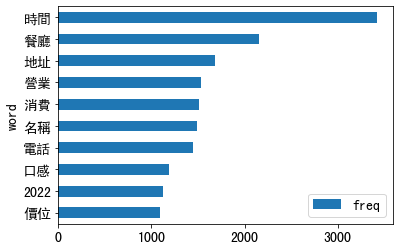

In [49]:
freq_df.iloc[:10].plot.barh(x='word', y='freq').invert_yaxis()
plt.show()

### 3.8 更新停用字字典

In [65]:
# 參數形式手動加入停用字
stopwords_manual = ["名稱","營業", "有沒有", "就是", "完整", "有無", "是否"]
stopwords.extend(stopwords_manual)

In [66]:
noStop_df_2 = noStop_df[~noStop_df['word'].isin(stopwords)]
noStop_df_2

,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,word
0,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023/01/31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,餐廳
0,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023/01/31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,徐淮
0,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023/01/31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,消費
0,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023/01/31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,時間
0,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023/01/31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,2023
...,...,...,...,...,...,...,...,...,...,...
54556,[食記]台北信義-捌伍添第85TD,2022/12/30,15:19:13,https://www.ptt.cc/bbs/Food/M.1672413555.A.BE8...,fickle85,Food,0,0,0,沙其瑪
54556,[食記]台北信義-捌伍添第85TD,2022/12/30,15:19:13,https://www.ptt.cc/bbs/Food/M.1672413555.A.BE8...,fickle85,Food,0,0,0,蛋捲
54556,[食記]台北信義-捌伍添第85TD,2022/12/30,15:19:13,https://www.ptt.cc/bbs/Food/M.1672413555.A.BE8...,fickle85,Food,0,0,0,不錯
54557,[食記]台北信義-捌伍添第85TD,2022/12/30,15:19:13,https://www.ptt.cc/bbs/Food/M.1672413555.A.BE8...,fickle85,Food,0,0,0,有脆


#### 重新計算詞頻

In [67]:
freq_df_2 = pd.DataFrame({'freq':noStop_df_2.groupby(['word']).size().sort_values(ascending=False)}).reset_index(drop = False)

clist = ['word','freq']  
freq_df_2 = freq_df_2[clist]
freq_df_2

,word,freq
0,時間,3421
1,餐廳,2153
2,地址,1682
3,消費,1515
4,電話,1442
...,...,...
35003,曼哈頓,1
35004,書香,1
35005,書牆,1
35006,書櫃,1


#### 重新繪製詞頻長條圖

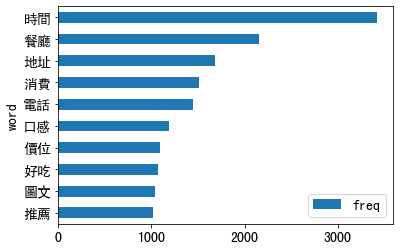

In [68]:
freq_df_2.iloc[:10].plot.barh(x='word', y='freq').invert_yaxis()
plt.show()

### 3.9 更新斷詞字典
更新斷詞字典有兩種方法

a. 自行定義的斷詞字典

In [69]:
# 載入自定義辭典：一個詞一行，每行分詞語、詞頻(可省)、詞性(可省)
jieba.load_userdict("dict/user_dict.txt")

b. 參數形式手動加入字詞

In [70]:
jieba.add_word('最低消費')
jieba.add_word('ABV地中海餐酒館')
jieba.add_word('新串 New Trend')
jieba.add_word('Vice Versa')

#### 重新斷詞

In [71]:
# sent_df是還沒斷詞過的df
word_df_2 = sent_df.assign(word = sent_df['sentence'].apply(jieba.lcut)).explode('word').drop(['sentence'], axis=1)

#把長度小於1的row刪掉
word_df_2 = word_df_2.loc[word_df_2['word'].str.len()>1]
word_df_2

,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,word
0,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023/01/31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,餐廳
0,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023/01/31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,名稱
0,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023/01/31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,徐淮
0,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023/01/31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,人家
0,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023/01/31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,消費
...,...,...,...,...,...,...,...,...,...,...
54556,[食記]台北信義-捌伍添第85TD,2022/12/30,15:19:13,https://www.ptt.cc/bbs/Food/M.1672413555.A.BE8...,fickle85,Food,0,0,0,蛋捲
54556,[食記]台北信義-捌伍添第85TD,2022/12/30,15:19:13,https://www.ptt.cc/bbs/Food/M.1672413555.A.BE8...,fickle85,Food,0,0,0,不錯
54557,[食記]台北信義-捌伍添第85TD,2022/12/30,15:19:13,https://www.ptt.cc/bbs/Food/M.1672413555.A.BE8...,fickle85,Food,0,0,0,有脆
54558,[食記]台北信義-捌伍添第85TD,2022/12/30,15:19:13,https://www.ptt.cc/bbs/Food/M.1672413555.A.BE8...,fickle85,Food,0,0,0,不會


#### 重新移除停用字

In [72]:
noStop_df_3 = word_df_2[~word_df_2['word'].isin(stopwords)]
noStop_df_3

,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,word
0,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023/01/31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,餐廳
0,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023/01/31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,徐淮
0,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023/01/31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,消費
0,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023/01/31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,時間
0,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023/01/31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,2023
...,...,...,...,...,...,...,...,...,...,...
54556,[食記]台北信義-捌伍添第85TD,2022/12/30,15:19:13,https://www.ptt.cc/bbs/Food/M.1672413555.A.BE8...,fickle85,Food,0,0,0,沙其瑪
54556,[食記]台北信義-捌伍添第85TD,2022/12/30,15:19:13,https://www.ptt.cc/bbs/Food/M.1672413555.A.BE8...,fickle85,Food,0,0,0,蛋捲
54556,[食記]台北信義-捌伍添第85TD,2022/12/30,15:19:13,https://www.ptt.cc/bbs/Food/M.1672413555.A.BE8...,fickle85,Food,0,0,0,不錯
54557,[食記]台北信義-捌伍添第85TD,2022/12/30,15:19:13,https://www.ptt.cc/bbs/Food/M.1672413555.A.BE8...,fickle85,Food,0,0,0,有脆


#### 重新計算詞頻

In [73]:
freq_df_3 = pd.DataFrame({'freq':noStop_df_3.groupby(['word']).size().sort_values(ascending=False)}).reset_index(drop = False)

clist = ['word','freq']
freq_df_3 = freq_df_3[clist]
freq_df_3

,word,freq
0,時間,3421
1,餐廳,2153
2,地址,1682
3,消費,1498
4,電話,1442
...,...,...
35003,書香,1
35004,書牆,1
35005,書櫃,1
35006,書本,1


#### 重新繪製詞頻長條圖

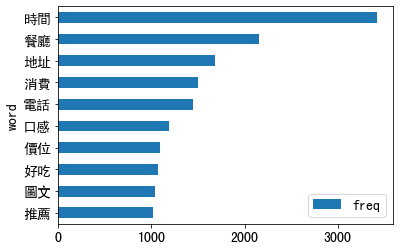

In [74]:
freq_df_3.iloc[:10].plot.barh(x='word', y='freq').invert_yaxis()
plt.show()

#### 繪製文字雲

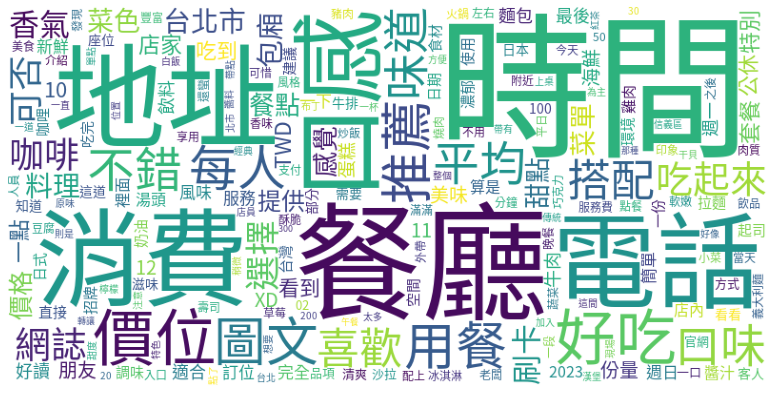

In [75]:
# 詞頻變成dict
freq_dict = freq_df_3.set_index('word', inplace=False).to_dict()
freq_dict = freq_dict['freq']

# 繪製文字雲
FontPath = 'raw_data/SourceHanSansTW-Regular.otf' # 設定字型
wordcloud = WordCloud(background_color='white',width=800, height = 400, font_path=FontPath, max_words=200)
wordcloud.generate_from_frequencies(freq_dict)
plt.figure(figsize = (14,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

儲存clean data，以便後續其他使用

In [76]:
noStop_df_3.to_csv("raw_data/clean_zh_data.csv", encoding = 'utf-8',index = False)